<a href="https://colab.research.google.com/github/ugurcankuzu/XAI/blob/main/lime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu notebook'ta XAI için bir diğer yöntem olan LIME'a göz atacağız.

Öncelikle pip kurulumlarını yapıp projeye dahil edelim.

In [ ]:
!pip install lime
import lime
import lime.lime_tabular
import pickle

Yine önceden kaydettiğimiz verileri ve modeli pickle yardımıyla çıkartıp projemizde tanımlıyoruz.

In [ ]:
with open("datasetAndModelOut.pkl","rb") as f:
  lr = pickle.load(f)
  testX = pickle.load(f)
  trainX = pickle.load(f)
  testY = pickle.load(f)
  trainY = pickle.load(f)

Burada Lime içerisinde lime_tabular alt modülünden Lime Tabular Explainer'ı çağırıyoruz. Lineer bir model ile çalıştığımız için burada burada TabularExplainer kullanıyoruz.

LimeTabularExplainer içerisine testX verilerimizin değerlerini, özellik adı olarak testX verimizdeki kolon adlarını ve Explainer modunu da regression şeklinde argüman olarak veriyoruz.

In [ ]:

limeExp = lime.lime_tabular.LimeTabularExplainer(testX.values,feature_names=testX.columns,mode="regression")

Aşağıdaki kod satırında ise oluşturduğumuz explainer'a ait explain instance metodunu çağırıyoruz. Bu metod aracılığı ile testX verimizdeki istediğimiz indexteki örnek için yapılan tahminin detaylarını görebiliyoruz.

Metoda argüman olarak istediğimiz indeksteki testX verilerini ve tahmin yaptırmak için gerekli olan predict metodunu yolluyoruz. Ve bunun çıktısını bir değişkende tutuyoruz.

In [ ]:
explanation = limeExp.explain_instance(testX.iloc[10],lr.predict)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Elimizdeki explanation değişkenini kullanarak çizim yaptırabiliriz.

Bu çizimde gördüğümüz üzere local bir explanation elde ediyoruz ve bu tahmin için her bir özelliğin ne kadar ve ne yönde etken olduğunu görebiliyoruz.

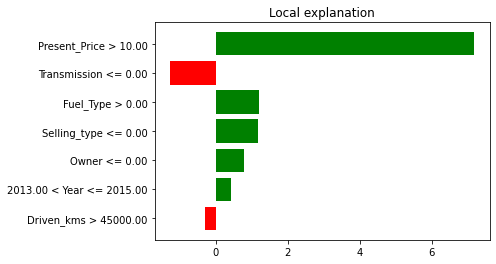

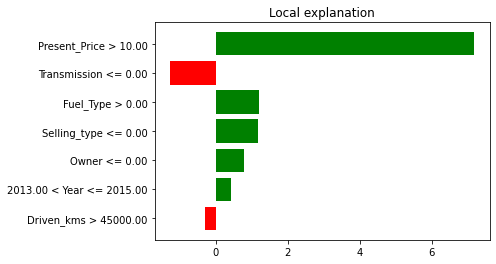

In [ ]:
explanation.as_pyplot_figure()

Aşağıda ise çizimini yaptırmak için seçtiğimiz örneğe ait bilgiler ve olması gereken tahmin fiyatı yer almaktadır.

In [ ]:
print(testX.iloc[10])
print("predicted price that must be : {}".format(testY.iloc[10]))

Year              2014.0
Present_Price       14.0
Driven_kms       63000.0
Fuel_Type            1.0
Selling_type         0.0
Transmission         0.0
Owner                0.0
Name: 282, dtype: float64
predicted price that must be : 8.25
